# preprocessing of data set

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder

train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

In [2]:
train.head(5)

,Trip_ID,Trip_Distance,Type_of_Cab,Customer_Since_Months,Life_Style_Index,Confidence_Life_Style_Index,Destination_Type,Customer_Rating,Cancellation_Last_1Month,Var1,Var2,Var3,Gender,Surge_Pricing_Type
0,T0005689460,6.77,B,1.0,2.42769,A,A,3.90500,0,40.0,46,60,Female,2
1,T0005689461,29.47,B,10.0,2.78245,B,A,3.45000,0,38.0,56,78,Male,2
2,T0005689464,41.58,NaN,10.0,NaN,NaN,E,3.50125,2,NaN,56,77,Male,2
3,T0005689465,61.56,C,10.0,NaN,NaN,A,3.45375,0,NaN,52,74,Male,3
4,T0005689467,54.95,C,10.0,3.03453,B,A,3.40250,4,51.0,49,102,Male,2


In [3]:
test.head()

,Trip_ID,Trip_Distance,Type_of_Cab,Customer_Since_Months,Life_Style_Index,Confidence_Life_Style_Index,Destination_Type,Customer_Rating,Cancellation_Last_1Month,Var1,Var2,Var3,Gender
0,T0005689459,9.44,A,10.0,2.57438,A,B,3.68000,2,NaN,46,63,Male
1,T0005689462,32.15,B,10.0,2.85143,A,A,1.59375,0,65.0,49,80,Female
2,T0005689463,10.38,C,4.0,2.70530,A,D,4.50500,0,NaN,47,74,Male
3,T0005689466,14.94,NaN,6.0,2.48159,C,E,4.53000,0,63.0,43,54,Male
4,T0005689468,32.03,B,7.0,2.81598,A,K,4.60125,3,96.0,44,56,Male


In [4]:
train.shape, test.shape

((131662, 14), (87395, 13))

In [5]:
#Combining both train and test dataset
fullData = pd.concat([train.iloc[:,:train.shape[1]-1],test],axis=0)

#Look at the available missing values in the dataset
fullData.isnull().sum()

Trip_ID                             0
Trip_Distance                       0
Type_of_Cab                     33368
Customer_Since_Months            9886
Life_Style_Index                33520
Confidence_Life_Style_Index     33520
Destination_Type                    0
Customer_Rating                     0
Cancellation_Last_1Month            0
Var1                           117819
Var2                                0
Var3                                0
Gender                              0
dtype: int64

In [6]:
fullData.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 219057 entries, 0 to 87394
Data columns (total 13 columns):
Trip_ID                        219057 non-null object
Trip_Distance                  219057 non-null float64
Type_of_Cab                    185689 non-null object
Customer_Since_Months          209171 non-null float64
Life_Style_Index               185537 non-null float64
Confidence_Life_Style_Index    185537 non-null object
Destination_Type               219057 non-null object
Customer_Rating                219057 non-null float64
Cancellation_Last_1Month       219057 non-null int64
Var1                           101238 non-null float64
Var2                           219057 non-null int64
Var3                           219057 non-null int64
Gender                         219057 non-null object
dtypes: float64(5), int64(3), object(5)
memory usage: 19.2+ MB


In [7]:
#Identify categorical and continuous variables
ID_col = ['Trip_ID']
target_col = ["Surge_Pricing_Type"]
cat_cols = ['Confidence_Life_Style_Index','Destination_Type','Gender','Type_of_Cab']

num_cols= list(set(list(fullData.columns))-set(cat_cols)-set(ID_col))
print(num_cols)

['Trip_Distance', 'Cancellation_Last_1Month', 'Var1', 'Var3', 'Customer_Since_Months', 'Var2', 'Life_Style_Index', 'Customer_Rating']


In [8]:
fullData.head()

,Trip_ID,Trip_Distance,Type_of_Cab,Customer_Since_Months,Life_Style_Index,Confidence_Life_Style_Index,Destination_Type,Customer_Rating,Cancellation_Last_1Month,Var1,Var2,Var3,Gender
0,T0005689460,6.77,B,1.0,2.42769,A,A,3.90500,0,40.0,46,60,Female
1,T0005689461,29.47,B,10.0,2.78245,B,A,3.45000,0,38.0,56,78,Male
2,T0005689464,41.58,NaN,10.0,NaN,NaN,E,3.50125,2,NaN,56,77,Male
3,T0005689465,61.56,C,10.0,NaN,NaN,A,3.45375,0,NaN,52,74,Male
4,T0005689467,54.95,C,10.0,3.03453,B,A,3.40250,4,51.0,49,102,Male


In [9]:
#Imputing Missing values with mean for continuous variable
fullData[num_cols] = fullData[num_cols].fillna(fullData[num_cols].mean(),inplace=True)
fullData.head()

C:\Users\anhnt\Anaconda2\lib\site-packages\pandas\core\generic.py:3191: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


,Trip_ID,Trip_Distance,Type_of_Cab,Customer_Since_Months,Life_Style_Index,Confidence_Life_Style_Index,Destination_Type,Customer_Rating,Cancellation_Last_1Month,Var1,Var2,Var3,Gender
0,T0005689460,6.77,B,1.0,2.427690,A,A,3.90500,0,40.000000,46,60,Female
1,T0005689461,29.47,B,10.0,2.782450,B,A,3.45000,0,38.000000,56,78,Male
2,T0005689464,41.58,NaN,10.0,2.802594,NaN,E,3.50125,2,64.095972,56,77,Male
3,T0005689465,61.56,C,10.0,2.802594,NaN,A,3.45375,0,64.095972,52,74,Male
4,T0005689467,54.95,C,10.0,3.034530,B,A,3.40250,4,51.000000,49,102,Male


In [10]:
fullData[cat_cols].mode()

,Confidence_Life_Style_Index,Destination_Type,Gender,Type_of_Cab
0,B,A,Male,B


In [11]:
#Imputing Missing values with mode for categorical variables
cat_imput=pd.Series(fullData[cat_cols].mode().values[0])
cat_imput.index=cat_cols
fullData[cat_cols] = fullData[cat_cols].fillna(cat_imput,inplace=True)

In [12]:
# Check the available missing values in the dataset
fullData.isnull().sum()

Trip_ID                        0
Trip_Distance                  0
Type_of_Cab                    0
Customer_Since_Months          0
Life_Style_Index               0
Confidence_Life_Style_Index    0
Destination_Type               0
Customer_Rating                0
Cancellation_Last_1Month       0
Var1                           0
Var2                           0
Var3                           0
Gender                         0
dtype: int64

In [13]:
fullData.std()

Trip_Distance               25.507368
Customer_Since_Months        3.544106
Life_Style_Index             0.208288
Customer_Rating              0.981100
Cancellation_Last_1Month     1.036244
Var1                        14.784007
Var2                         4.974497
Var3                        11.580112
dtype: float64

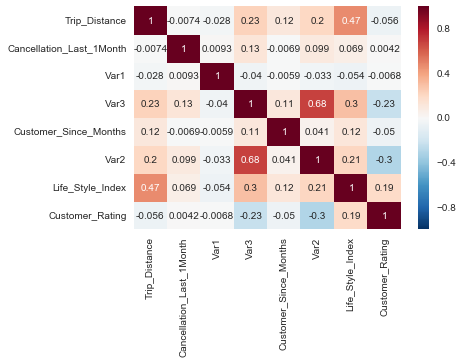

In [14]:
import seaborn as sns
%matplotlib inline
corr = fullData[num_cols].corr()
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values, annot=True)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x104D74F0>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x0B1046D0>]], dtype=object)

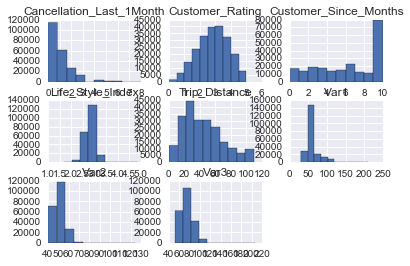

In [15]:
fullData[num_cols].hist()

In [16]:
#create label encoders for categorical features
for var in cat_cols:
    number = LabelEncoder()
    fullData[var] = number.fit_transform(fullData[var].astype('str'))

In [17]:
import matplotlib.pyplot as plt

In [18]:
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import LabelEncoder
norm = Normalizer()

In [19]:
fullData[num_cols] = norm.fit_transform(fullData[num_cols])

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0AE59990>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x12C73C70>]], dtype=object)

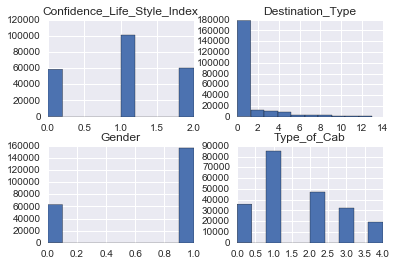

In [20]:
fullData[cat_cols].hist()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x12EA97D0>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x0A6B4F10>]], dtype=object)

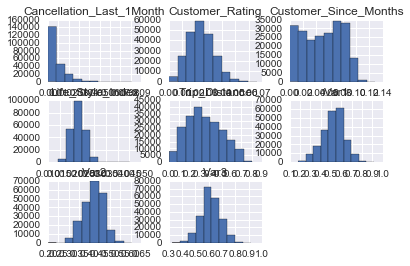

In [21]:
fullData[num_cols].hist()

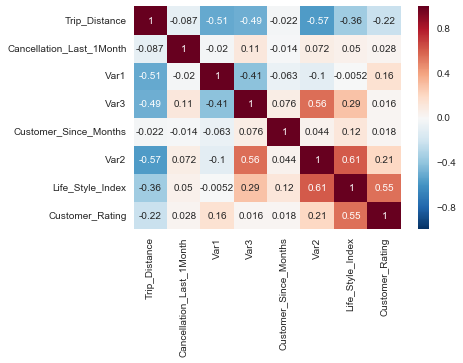

In [22]:
corr = fullData[num_cols].corr()
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values, annot=True)

In [23]:
fullData.std()

Trip_Distance                  0.166279
Type_of_Cab                    1.180615
Customer_Since_Months          0.029459
Life_Style_Index               0.002877
Confidence_Life_Style_Index    0.734770
Destination_Type               1.902580
Customer_Rating                0.009379
Cancellation_Last_1Month       0.008526
Var1                           0.106063
Var2                           0.048536
Var3                           0.072717
Gender                         0.452491
dtype: float64

In [24]:
fullData.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 219057 entries, 0 to 87394
Data columns (total 13 columns):
Trip_ID                        219057 non-null object
Trip_Distance                  219057 non-null float64
Type_of_Cab                    219057 non-null int32
Customer_Since_Months          219057 non-null float64
Life_Style_Index               219057 non-null float64
Confidence_Life_Style_Index    219057 non-null int32
Destination_Type               219057 non-null int32
Customer_Rating                219057 non-null float64
Cancellation_Last_1Month       219057 non-null float64
Var1                           219057 non-null float64
Var2                           219057 non-null float64
Var3                           219057 non-null float64
Gender                         219057 non-null int32
dtypes: float64(8), int32(4), object(1)
memory usage: 19.2+ MB


In [25]:
test['Surge_Pricing_Type'] = np.nan
fullData['Surge_Pricing_Type'] = pd.concat([pd.DataFrame(train.Surge_Pricing_Type), pd.DataFrame(test.Surge_Pricing_Type)], axis=0)
fullData.tail()

,Trip_ID,Trip_Distance,Type_of_Cab,Customer_Since_Months,Life_Style_Index,Confidence_Life_Style_Index,Destination_Type,Customer_Rating,Cancellation_Last_1Month,Var1,Var2,Var3,Gender,Surge_Pricing_Type
87390,T0005908503,0.250109,2,0.025495,0.020457,2,0,0.008477,0.000000,0.628885,0.407925,0.611888,0,NaN
87391,T0005908504,0.111804,2,0.075391,0.019376,0,3,0.035763,0.000000,0.821758,0.316641,0.452344,0,NaN
87392,T0005908505,0.311546,0,0.049373,0.025364,2,0,0.013454,0.000000,0.527439,0.469047,0.633625,1,NaN
87393,T0005908511,0.074962,2,0.007052,0.019764,1,9,0.018326,0.007052,0.754558,0.359649,0.543000,1,NaN
87394,T0005908515,0.329211,1,0.086726,0.026041,0,0,0.017822,0.000000,0.555877,0.416283,0.633098,0,NaN


In [26]:
fullData.shape

(219057, 14)

In [27]:
fullData = fullData.drop('Trip_ID', axis=1)
fullData.shape

(219057, 13)

In [28]:
from sklearn.cross_validation import train_test_split
train_, validate = train_test_split(fullData.iloc[:train.shape[0],:], test_size=0.2)

x_train = train_.iloc[:,:train_.shape[1]-1].values
y_train = train_.Surge_Pricing_Type.values

x_validate = validate.iloc[:,:train_.shape[1]-1].values
y_validate = validate.Surge_Pricing_Type.values

x_test = fullData.iloc[train.shape[0]:,:train_.shape[1]-1].values

(x_train.shape, y_train.shape,x_validate.shape, y_validate.shape, x_test.shape)

((105329, 12), (105329,), (26333, 12), (26333,), (87395, 12))

In [40]:
from operator import itemgetter
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
 
names = [
        "Nearest Neighbors", 
         "Decision Tree",
         "Random Forest",
         "AdaBoost", 
        "Naive Bayes"
        # "QDA"
        ]
 
classifiers = [
    KNeighborsClassifier(3),
    DecisionTreeClassifier(max_depth=5),
    RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1),
    AdaBoostClassifier(),
    GaussianNB()
    #QuadraticDiscriminantAnalysis()
    ]

In [31]:
import time
import pyprind

def time_diff_str(t1, t2):
    """
    Calculates time durations.
    """
    diff = t2 - t1
    mins = int(diff / 60)
    secs = round(diff % 60, 2)
    return str(mins) + " mins and " + str(secs) + " seconds"

In [41]:
results = {}
results_time = {}


for name,clf in zip(names, classifiers):
    t0 = time.time()
    clf.fit(x_train, y_train)
    results[name] = clf.score(x_validate, y_validate)
    results_time[name] = time_diff_str(t0, time.time())
print "---------------------------"
print "Evaluation results"
print "---------------------------"
sorted(results.items(), key=itemgetter(1))

for name in results:
    print name + " accuracy: %0.3f" % results[name]
    print "Time: %s" % results_time[name]
    print "---------------------------"

---------------------------
Evaluation results
---------------------------
AdaBoost accuracy: 0.677
Time: 0 mins and 13.76 seconds
---------------------------
Naive Bayes accuracy: 0.638
Time: 0 mins and 0.09 seconds
---------------------------
Random Forest accuracy: 0.573
Time: 0 mins and 0.95 seconds
---------------------------
Nearest Neighbors accuracy: 0.594
Time: 0 mins and 34.68 seconds
---------------------------
Decision Tree accuracy: 0.675
Time: 0 mins and 1.12 seconds
---------------------------


In [44]:
clf = AdaBoostClassifier()
from sklearn.grid_search import GridSearchCV
parameter_grid = {'n_estimators': [50, 70, 100],
                  'algorithm': ['SAMME', 'SAMME.R']}
 
grid_search = GridSearchCV(clf,
                           param_grid=parameter_grid)

grid_search.fit(x_validate, y_validate)
print('Best score: {}'.format(grid_search.best_score_))
print('Best parameters: {}'.format(grid_search.best_params_))

Best score: 0.678426309194
Best parameters: {'n_estimators': 50, 'algorithm': 'SAMME.R'}


In [49]:
clf = grid_search.best_estimator_
y_test = clf.predict(x_test).astype(int)

In [59]:
from sklearn.cross_validation import KFold

kf = KFold(len(x_train),n_folds=10)

for i, j in kf:
    clf.fit(x_train[i], y_train[i])
    print (clf.score(x_train[j], y_train[j]))

0.686698946169
0.678534130827
0.669230038925
0.67255292889
0.684515332764
0.681192442799
0.683281116491
0.678724010253
0.674831482009
0.668154196734


In [51]:
result = pd.DataFrame()
result['Trip_ID'] = test['Trip_ID']
result['Surge_Pricing_Type'] = y_test
result.head()

,Trip_ID,Surge_Pricing_Type
0,T0005689459,1
1,T0005689462,2
2,T0005689463,2
3,T0005689466,2
4,T0005689468,2


In [53]:
result.to_csv('submission.csv', index=False)